In [124]:
import pandas as pd

avaliacoes = pd.read_csv("b2w.csv")

In [125]:
avaliacoes.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [126]:
avaliacoes.polarity.value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [127]:
avaliacoes.isnull().sum()

original_index               0
review_text                  0
review_text_processed        0
review_text_tokenized        0
polarity                 16315
rating                       0
kfold_polarity               0
kfold_rating                 0
dtype: int64

In [128]:
avaliacoes = avaliacoes.drop(["original_index", "review_text_processed", 
                              "review_text_tokenized", "rating", "kfold_polarity",
                                "kfold_rating"], axis=1)

In [129]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [130]:
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
...,...,...
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,1.0
132369,Eu estou muito chateado com isso gostaria que ...,0.0
132371,O produto anunciado no site dizia ser 100% al...,0.0


In [131]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text,
                                                              avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state = 71)

In [132]:
from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Este produto é muito bom','este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [134]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [135]:
matriz_esparsa

,bom,este,muito,produto,ruim
0,1,1,1,1,0
1,0,1,1,1,1


In [136]:
vetorizar = CountVectorizer(max_features=100)
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [137]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100)
  bag_of_words = vetorizar.fit_transform(dados[coluna_texto])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                dados[coluna_sentimento],
                                                                stratify=dados[coluna_sentimento],
                                                                random_state = 71)
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

In [138]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8873686024470102


# Word Cloud 
 Estamos criando um WordCloud 

In [139]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)


In [140]:
avaliacoes.review_text

0         Bem macio e felpudo...recomendo.  Preço imbatí...
1         Produto excepcional!  recomendo!!! inovador e ...
2         recebi o produto antes do prazo mas veio com d...
3         Bom custo beneficio. Adequado para pessoas que...
5         ótmo produto atendeu as expectativas, a entreg...
                                ...                        
132367    Ótimo jogo, um dos melhores que joguei. Entreg...
132368    SMARTHPHONE  PERFEITO  MUITO  BOM  E  A  ECONO...
132369    Eu estou muito chateado com isso gostaria que ...
132371    O produto anunciado no site dizia ser  100% al...
132372    Não recebi o produto e consta como entregue no...
Name: review_text, Length: 116058, dtype: object

In [141]:
todas_avaliacoes

['Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar',
 'Produto excepcional!  recomendo!!! inovador e gostoso de ler!!',
 'recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto',
 'Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.',
 'ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom',
 'GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.',
 'Adorei, entrega no prazo e produto conforme eu esperava, recomendadíssimo.',
 'Já é o segundo processador deste modelo que compro (o primeiro foi para minha mãe) e só tenho elogios. É muito forte e facilita bastante os processos.',
 'Nao recebi!!!  endereço para entrega : rua augusto hog, 18

In [142]:
print(
    len(todas_palavras),
    len(todas_avaliacoes)
)

16570763 116058


In [143]:
nuvem_palavras = WordCloud().generate(todas_palavras)
# O WordCloud tokeniza o texto internamente mas WordCloud é só visualização
# por isso usando outras técnicas que ter permitem olhar frequência 
#  e outros dados você precisa tokenizar

In [144]:
nuvem_palavras

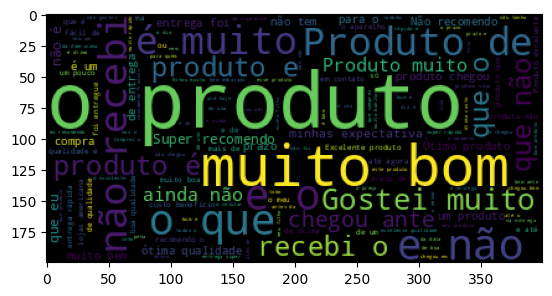

In [145]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)

In [146]:
nuvem_palavras = WordCloud(width=800, height=500,
  max_font_size=110,
  collocations=False).generate(todas_palavras)

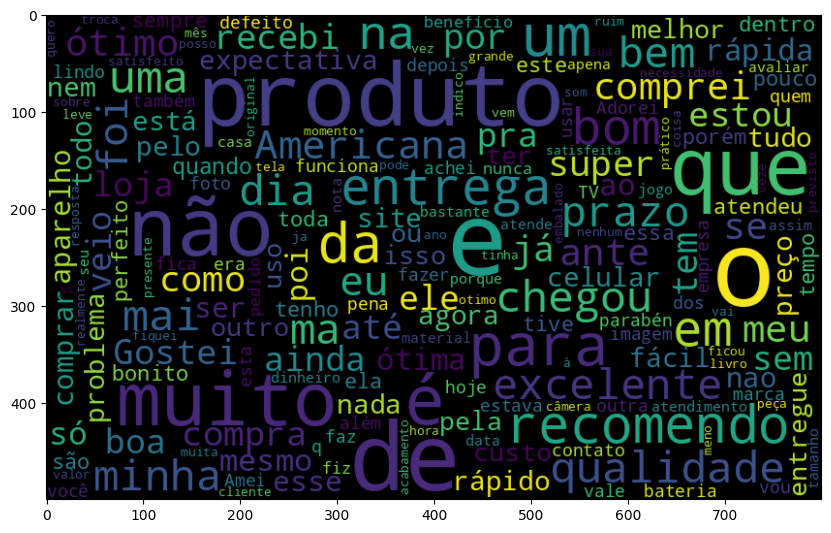

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation="bilinear") # interpolartion para nitidez aqui 

In [148]:
def wordcloud_negativas(dados, coluna_texto):
    texto_negativo = dados.query("polarity == 0")
    todas_avaliacoes =[texto for texto in texto_negativo[coluna_texto]]
    todas_palavras = " " .join(todas_avaliacoes)
    nuvem_palavras = WordCloud(width=800, height=500,
                               max_font_size=110,
                               collocations=False).generate(todas_palavras) 
    #colocations false tira a junção das palavras tipo "o produto"
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation="bilinear") # interpolartion para nitidez aqui 
    plt.axis("off")
    plt.show()
    
    


In [149]:
def wordcloud_positivas(dados, coluna_texto):
    texto_positivo = dados.query("polarity == 1")
    todas_avaliacoes =[texto for texto in texto_positivo[coluna_texto]]
    todas_palavras = " " .join(todas_avaliacoes)
    nuvem_palavras = WordCloud(width=800, height=500,
                               max_font_size=110,
                               collocations=False).generate(todas_palavras) 
    #colocations false tira a junção das palavras tipo "o produto"
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation="bilinear") # interpolartion para nitidez aqui 
    plt.axis("off")
    plt.show()
    
    


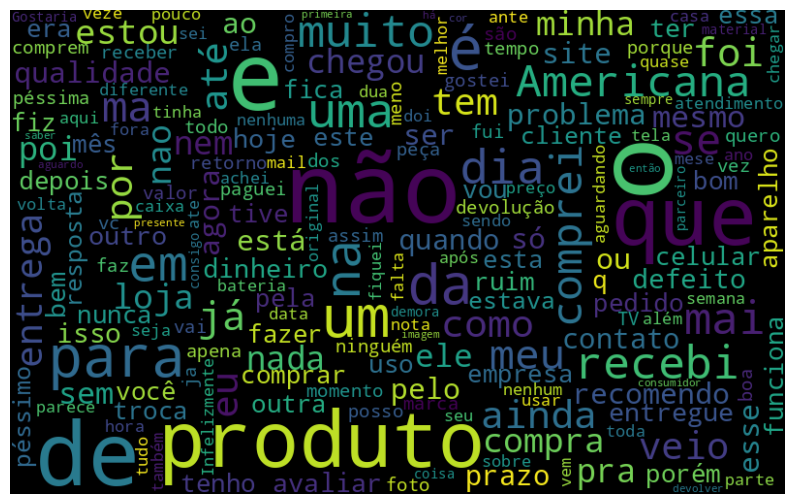

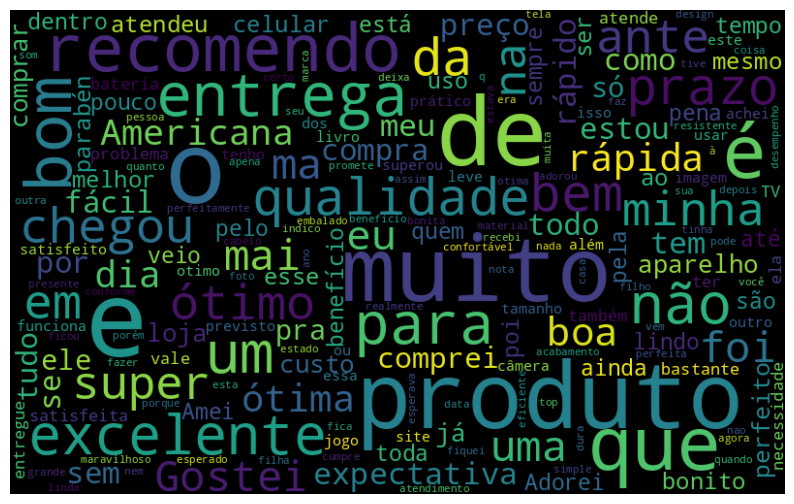

In [150]:
wordcloud_negativas(avaliacoes,'review_text')
wordcloud_positivas(avaliacoes,'review_text')

# NLTK


In [151]:
# import nltk
# nltk.download("all")

In [152]:
import nltk

corpus = ["Muito bom este produto", "Muito ruim este produto"]
frequencia = nltk.FreqDist(corpus)
frequencia


FreqDist({'Muito bom este produto': 1, 'Muito ruim este produto': 1})

In [153]:
from nltk import tokenize

frase = "Muito bom este produto"

token_por_espaço = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaço.tokenize(frase)
token_frase


['Muito', 'bom', 'este', 'produto']

In [154]:
from nltk import tokenize

frase = "Muito bom este produto"

token_por_espaço = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaço.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)


In [155]:
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [156]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values()) })

In [157]:
df_frequencia

,Palavra,Frequencia
0,Bem,413
1,macio,216
2,e,89308
3,felpudo...recomendo.,1
4,Preço,334
...,...,...
136212,fábrica'.,1
136213,SMARTHPHONE,1
136214,FANTASTICA,1
136215,poder.,1


In [158]:
df_frequencia_dez = df_frequencia.nlargest(columns="Frequencia", n= 10)

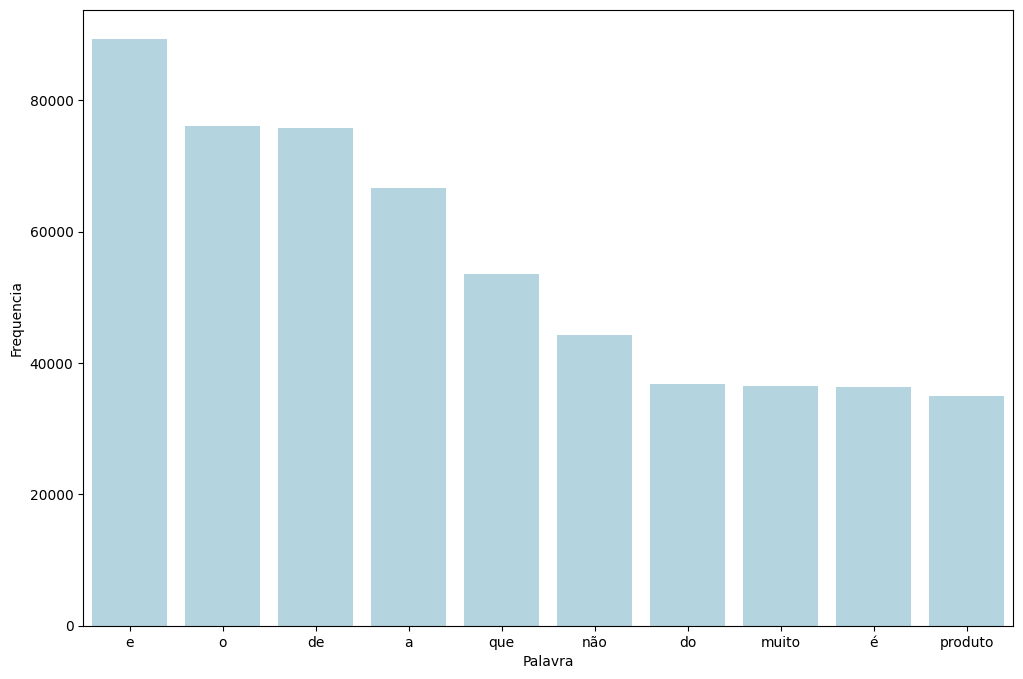

In [159]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_frequencia_dez, x = 'Palavra', y =  'Frequencia', color= 'lightblue')
plt.show()

In [160]:
def grafico(dados, coluna_texto, quantidade):
    todas_palavras = ''.join([texto for texto in  dados[coluna_texto]])
    token_por_espaço = tokenize.WhitespaceTokenizer()
    token_frase = token_por_espaço.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values()) })
    df_frequencia  = df_frequencia.nlargest(columns="Frequencia", n= quantidade)
    import seaborn as sns

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencia, x = 'Palavra', y =  'Frequencia', color= 'lightblue')
    plt.show()
    

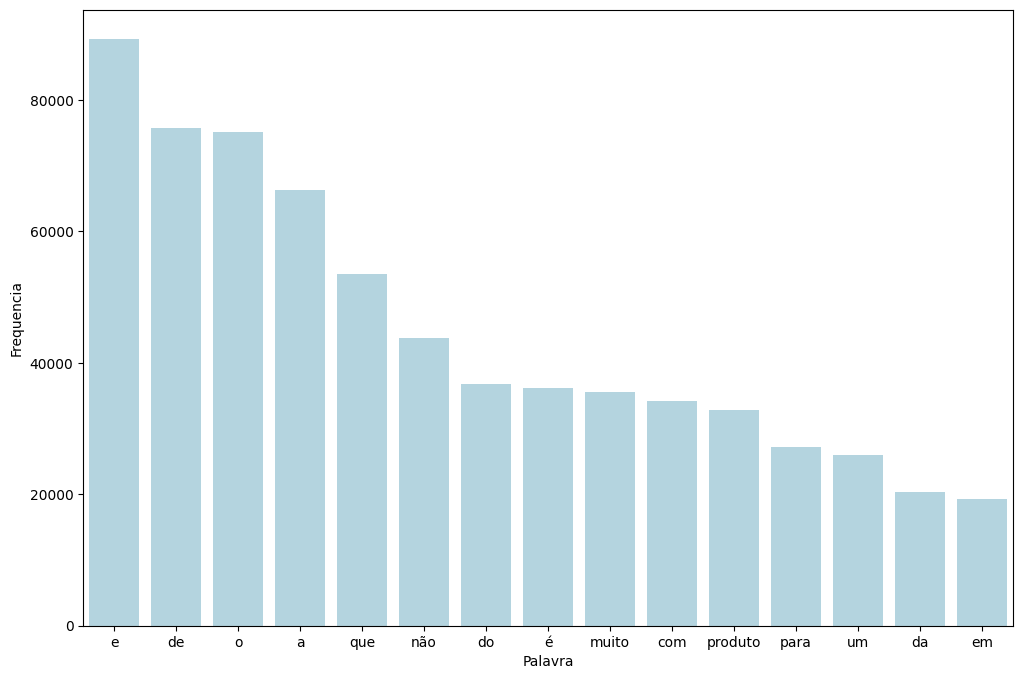

In [161]:
grafico(avaliacoes,'review_text', 15)

# Stop Words

In [162]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes



['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [163]:

frase_processadas = list()
for avaliacao in avaliacoes.review_text:
    nova_frase = list()
    frase_texto = token_por_espaço.tokenize(avaliacao)
    for palavra in frase_texto:
        if palavra not in  palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processadas.append( " ".join(nova_frase))   

avaliacoes['Texto_sem_StopWords'] = frase_processadas     

In [164]:
avaliacoes.head()

,review_text,polarity,Texto_sem_StopWords
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco..."


In [165]:
treinar_modelo(avaliacoes,"Texto_sem_StopWords",'polarity')

0.8790970187833879

In [166]:
frase_processadas

['Bem macio felpudo...recomendo. Preço imbatível entrega rápida. Compraria outro precisar',
 'Produto excepcional! recomendo!!! inovador gostoso ler!!',
 'recebi produto antes prazo veio defeito trava usar agora Americanas resolveu preciso deste produto',
 'Bom custo beneficio. Adequado pessoas fazem uso casual aparelho . A máquina fotográfica excelente . A tela fornece imagens ótimas . Os recursos aparelho fáceis manejar.',
 'ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom',
 'GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.',
 'Adorei, entrega prazo produto conforme esperava, recomendadíssimo.',
 'Já segundo processador deste modelo compro (o primeiro mãe) elogios. É forte facilita bastante processos.',
 'Nao recebi!!! endereço entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!',
 'Não compra produto, pois veio botões travados tentar ligar ligou. Péssima qualidade.',
 'Adore

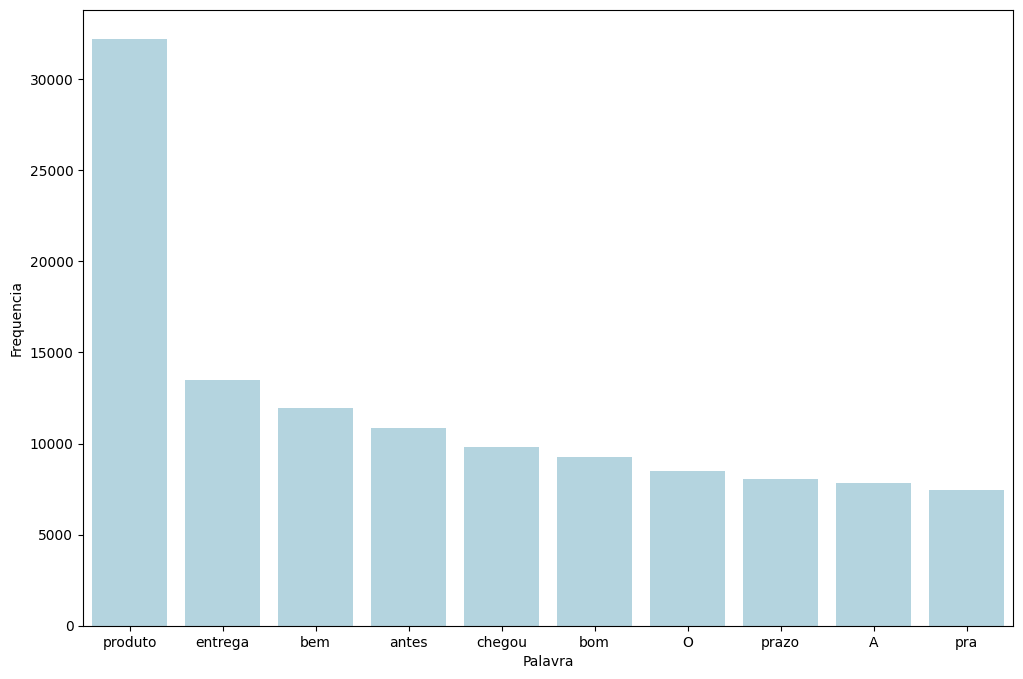

In [168]:
grafico(avaliacoes, 'Texto_sem_StopWords', 10)

In [171]:
from nltk import tokenize

frase = "Muito bom, também esse produto"

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

token_frase

['Muito', 'bom', ',', 'também', 'esse', 'produto']

In [174]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [176]:
lista_pontuacao = list()

for ponto in punctuation:
    lista_pontuacao.append(ponto)

In [177]:
lista_pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [178]:
pontuacao_stop_words = lista_pontuacao + palavras_irrelevantes

In [179]:

frase_processadas = list()
for avaliacao in avaliacoes.Texto_sem_StopWords:
    nova_frase = list()
    frase_texto = token_pontuacao.tokenize(avaliacao)
    for palavra in frase_texto:
        if palavra not in  pontuacao_stop_words:
            nova_frase.append(palavra)
    frase_processadas.append( " ".join(nova_frase))   

avaliacoes['Texto_sem_StopWords_pontuacao'] = frase_processadas     

In [180]:
avaliacoes.head()

,review_text,polarity,Texto_sem_StopWords,Texto_sem_StopWords_pontuacao
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...
